# Stock Price Prediction 
Welcome to the code notebook for stock price prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

In [43]:
#importing data
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*10)
ticker = 'AAPL'
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [44]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-06,28.219818,28.271331,27.962256,27.982414,112241600
2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200
2015-07-08,27.451616,27.915228,27.444898,27.879394,243046400
2015-07-09,26.891701,27.785328,26.701329,27.738295,314380000
2015-07-10,27.610630,27.738291,27.147019,27.310515,245418000
2015-07-13,28.143665,28.166062,27.843549,28.002565,165762000
2015-07-14,28.132473,28.302688,28.004812,28.228779,127072400
2015-07-15,28.403469,28.477379,28.125751,28.157106,134596800


In [8]:
data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-20,201.000000,201.699997,196.860001,198.240005,96813500
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800
2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900


In [9]:
df = data[['Close']].copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

Price,Close
Ticker,AAPL
0,28.219824
1,28.150393
2,27.451612
3,26.891701
4,27.610632


## Visualization

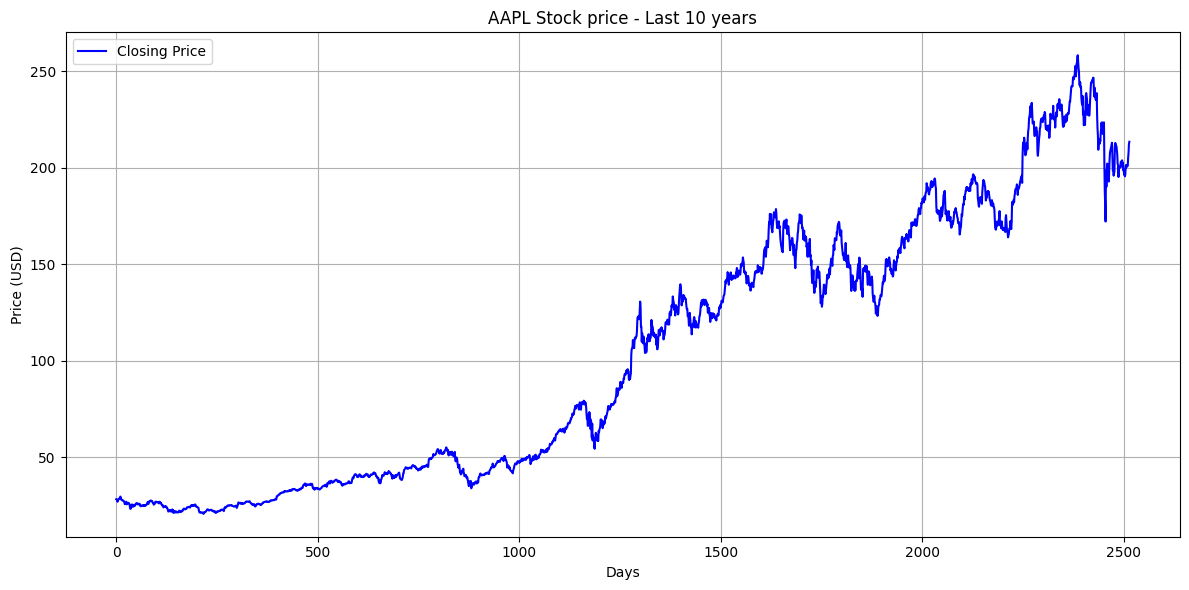

In [10]:
#visualizing raw closing prices over the time
plt.figure(figsize=(12, 6))
plt.plot(df, label='Closing Price', color='blue')
plt.title(f'{ticker} Stock price - Last 10 years')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

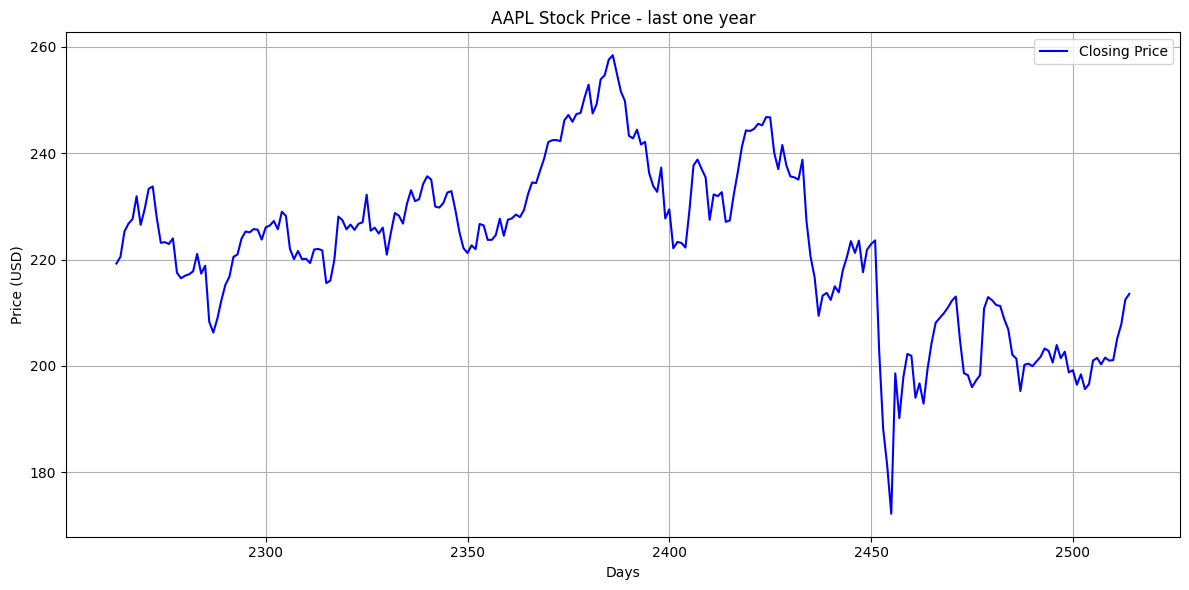

In [11]:
#Zooming into last one year of prices
plt.figure(figsize=(12,6))
plt.plot(df[-252:], label='Closing Price', color='blue')
plt.title(f'{ticker} Stock Price - last one year')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

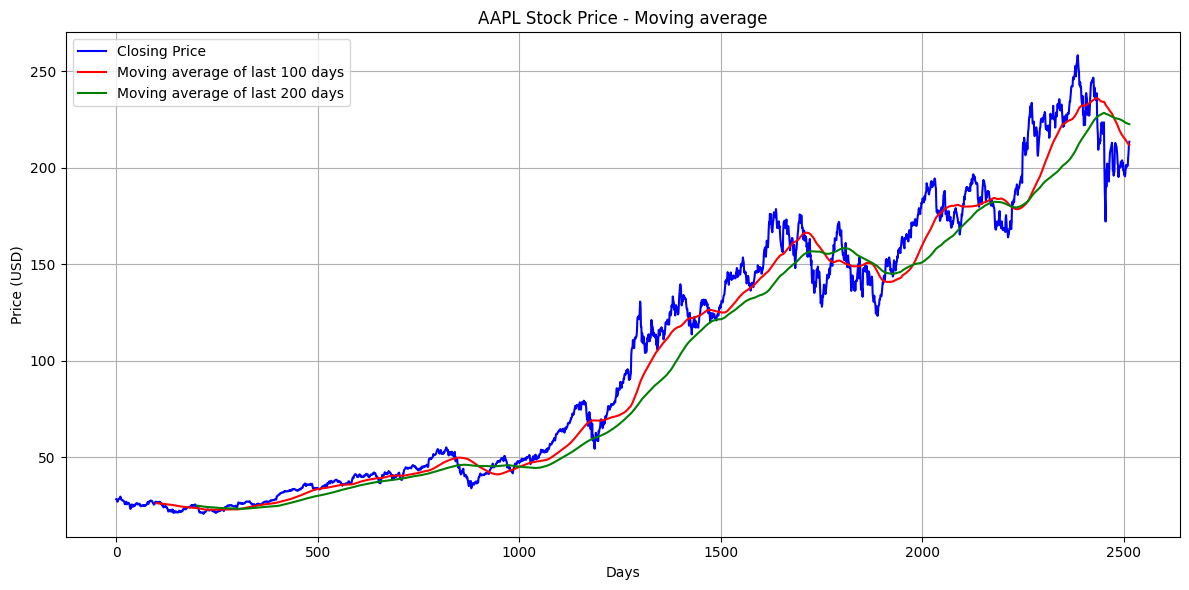

In [12]:
#plotting moving averages
ma_100 = df.rolling(window=100).mean()
ma_200 = df.rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df, label='Closing Price', color='blue')
plt.plot(ma_100, label='Moving average of last 100 days', color='red')
plt.plot(ma_200, label='Moving average of last 200 days', color='green')
plt.title(f'{ticker} Stock Price - Moving average')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Scaling the data

In [13]:
#Slacing the data
from sklearn.preprocessing import MinMaxScaler

closing_price = df.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price)

x = []  #past 60 days(feature)
y = []  #prediction(label)

sequence_length = 60
for i in range(sequence_length, len(scaled_data)):
  x.append(scaled_data[i-sequence_length:i])
  y.append(scaled_data[i])

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(2455, 60, 1)
(2455, 1)


In [14]:
len(x)

2455

In [15]:
#splitting the data into training and testing set
train_size = int(len(x)*0.7)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (1718, 60, 1) (1718, 1)
Test shape: (737, 60, 1) (737, 1)


## Model training

In [16]:
#ml model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [17]:
model = Sequential()

#1st LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

#2nd LSTM layer
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))

#3rd LSTM layer
model.add(LSTM(units=80, return_sequences=False))
model.add(Dropout(0.4))

#dense layer
model.add(Dense(units=1))

#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,241 (321.25 KB)

 Trainable params: 82,241 (321.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#training model
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - loss: 0.0231
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0018
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0013
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0015
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0016
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0012
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0014
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0011
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0011
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0012
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0011
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0012
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 8.3736e-04
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0011
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 

## Prediction

In [20]:
# make prediction
predicted_prices = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [21]:
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

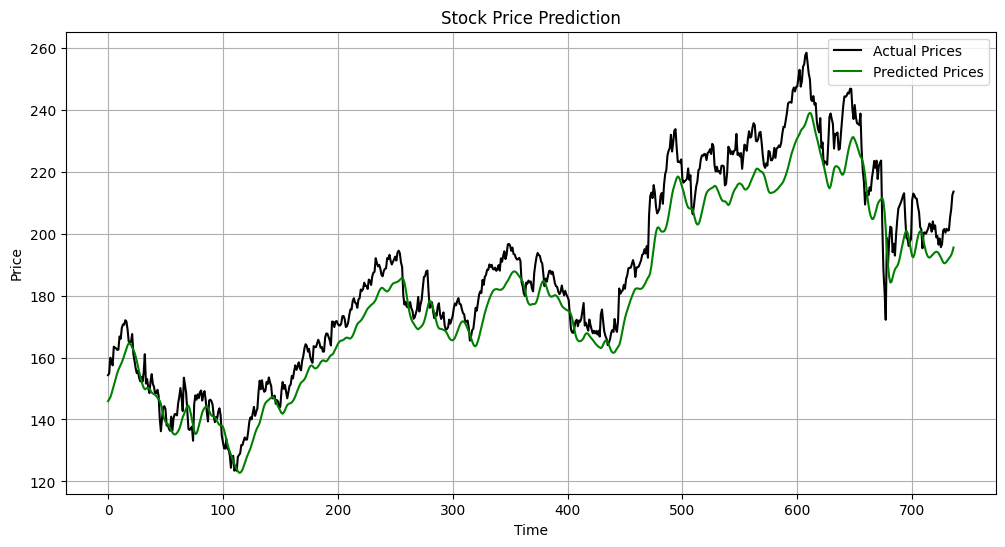

In [22]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(predicted_prices, color='green', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#future prediction for 100 days
last_60_days = scaled_data[-60:].copy()

future_predictions_60 = []

for i in range(60):
  input_sequence = last_60_days[-60:] # Take last 60 values
  input_sequence = input_sequence.reshape(1, 60, 1)

  predicted_value = model.predict(input_sequence, verbose=0) #predicion
  future_predictions_60.append(predicted_value[0, 0]) #save prediction

  # Append prediction to the end of last_60_days for next round
  last_60_days = np.append(last_60_days, predicted_value, axis=0)

In [24]:
# Convert to numpy array and reshape for scaler
future_predictions_60 = np.array(future_predictions_60).reshape(-1, 1)

# Inverse transform to get actual price values
future_predictions_60_real = scaler.inverse_transform(future_predictions_60)

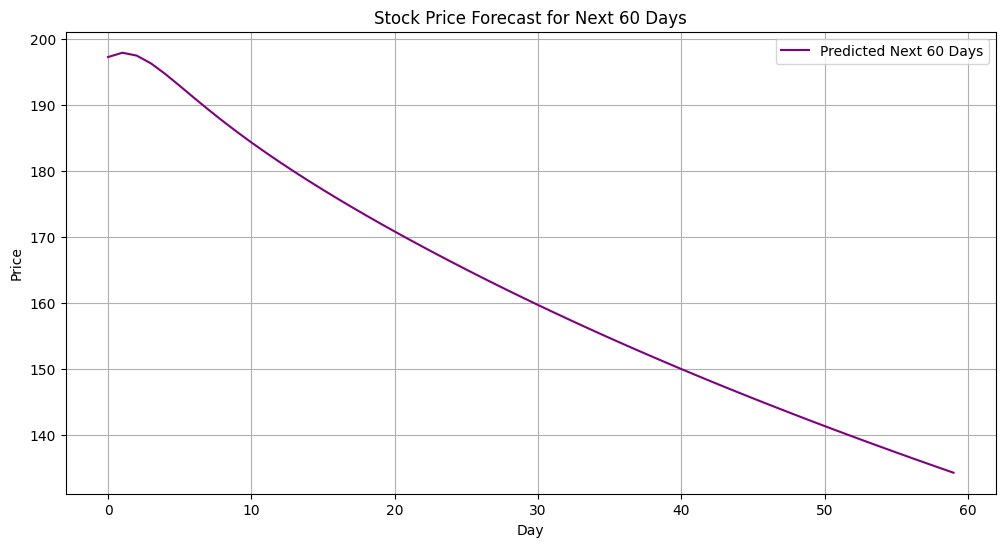

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_60_real, label='Predicted Next 60 Days', color='purple')
plt.title('Stock Price Forecast for Next 60 Days')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Get the last date from your existing data
last_date = data.index[-1]

# Generate next 60 business days (skip weekends)
future_dates = pd.bdate_range(start=last_date+pd.Timedelta(days=1), periods=60)

#create data frame
prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted price': future_predictions_60_real.flatten()
})

prediction_df.set_index('Date', inplace=True)

In [27]:
prediction_df.head()

,Predicted price
Date,
2025-07-04,197.319885
2025-07-07,197.976852
2025-07-08,197.539368
2025-07-09,196.348267
2025-07-10,194.741440


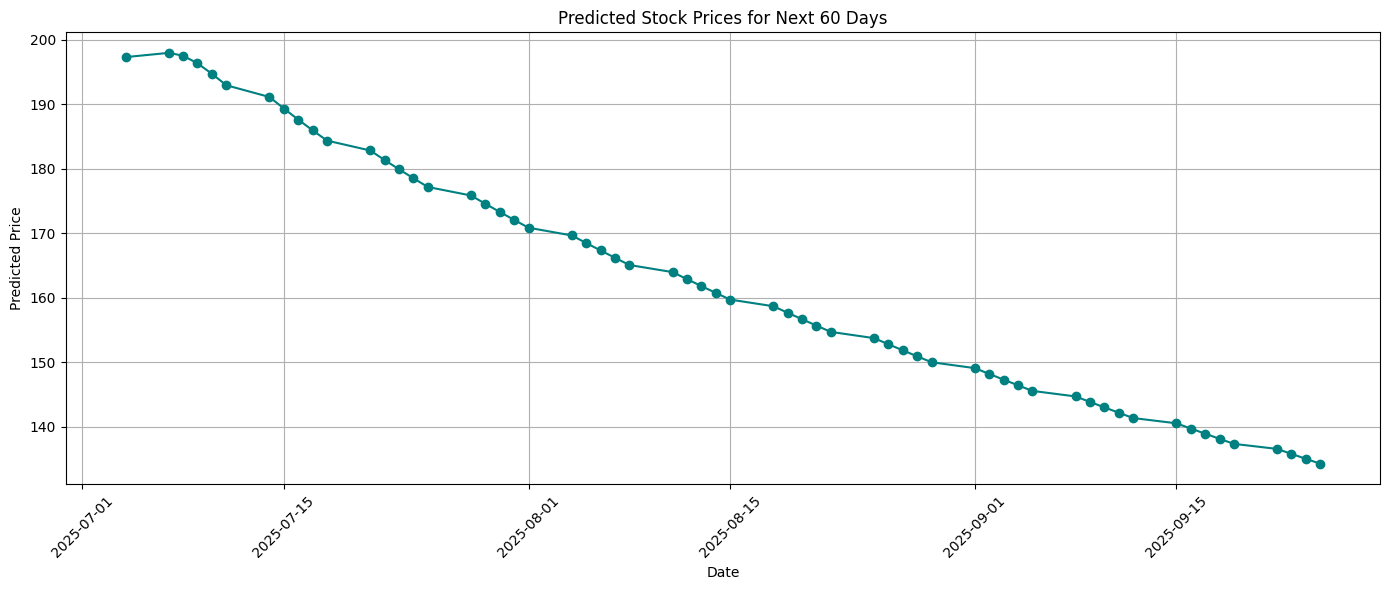

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(prediction_df.index, prediction_df['Predicted price'], marker='o', linestyle='-', color='teal')
plt.title('Predicted Stock Prices for Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
nifty = yf.download("^NSEI", period="1d", interval="1m", auto_adjust=True)
sensex = yf.download("^BSESN", period="1d", interval="1m", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [30]:
nifty.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Datetime,,,,,
2025-07-03 03:45:00+00:00,25486.199219,25518.250000,25486.199219,25496.300781,0
2025-07-03 03:46:00+00:00,25513.050781,25513.050781,25485.449219,25485.449219,0
2025-07-03 03:47:00+00:00,25511.400391,25512.650391,25503.449219,25512.650391,0
2025-07-03 03:48:00+00:00,25515.050781,25519.250000,25510.699219,25511.900391,0
2025-07-03 03:49:00+00:00,25521.050781,25522.099609,25512.300781,25516.199219,0


In [31]:
import os
save_path = '/content/drive/MyDrive/Real_time_stock _price_prediction/saved_models'
model.save(f"{save_path}/stock_model.h5")

In [32]:
import joblib
# Save the scaler
joblib.dump(scaler, "/content/drive/MyDrive/Real_time_stock _price_prediction/saved_models/scaler.pkl")

['/content/drive/MyDrive/Real_time_stock _price_prediction/saved_models/scaler.pkl']

In [39]:
def get_live_index(ticker):
  df = yf.download(ticker, period="1d", interval="1m")
  if df.empty:
    return None, None
  current = df['Close'].iloc[-1]
  change = ((df['Close'].iloc[-1] - df['Open'].iloc[0]) / df['Open'].iloc[0]) * 100
  return current, change

In [40]:
nifty, nifty_chg = get_live_index("^NSEI")
sensex, sensex_chg = get_live_index("^BSESN")

/tmp/ipython-input-39-724419520.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval="1m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-39-724419520.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval="1m")
[*********************100%***********************]  1 of 1 completed
